# Imports

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
df = pd.read_csv('/content/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
df.shape

(2416, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


# Data Analysis

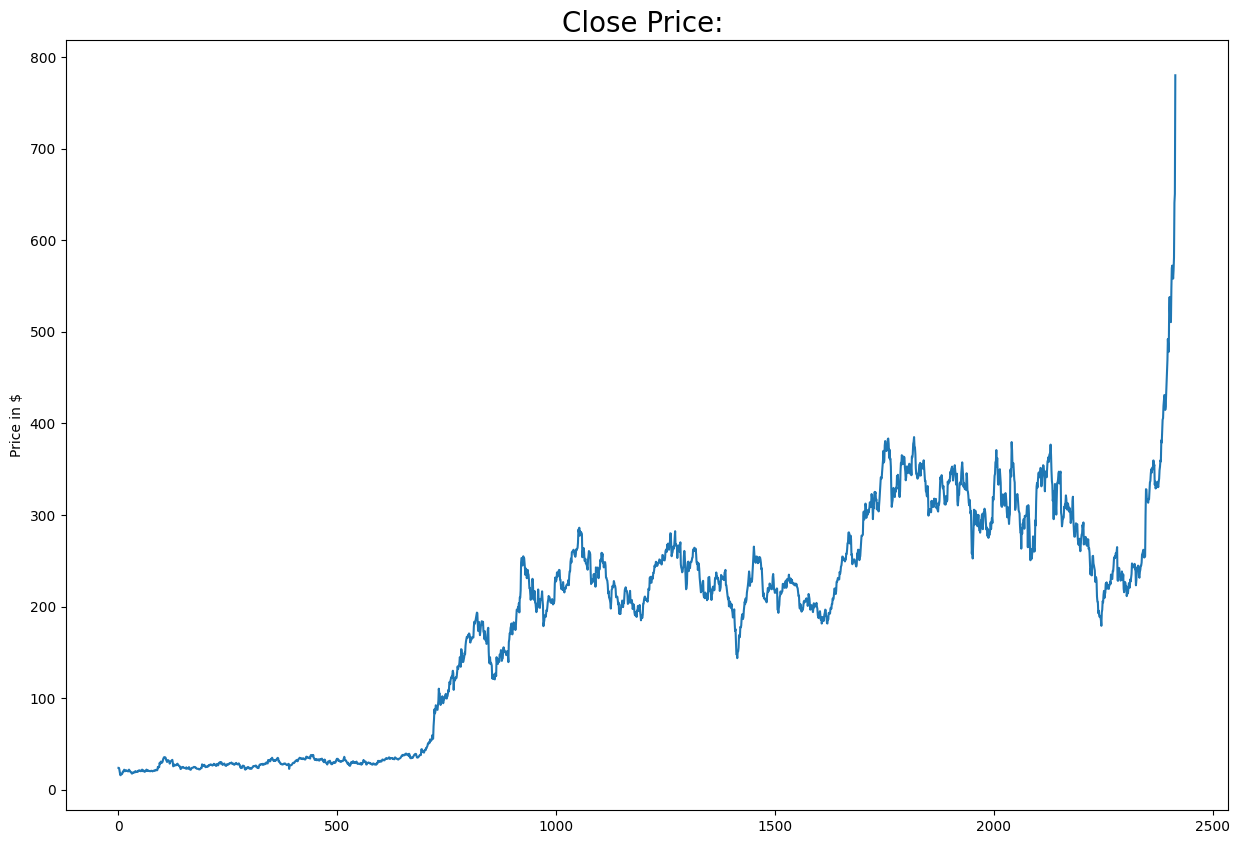

In [6]:
plt.figure(figsize=(15,10))
plt.plot(df['Close'])
plt.title("Close Price: ", fontsize=20)
plt.ylabel('Price in $')
plt.show()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [8]:
'''
If we observe carefully we can see that the data in the ‘Close’ column
and that available in the ‘Adj Close’ column is the same,
let’s check whether this is the case with each row or not.
'''
df[df['Close'] == df['Adj Close']].shape

(2416, 7)

In [9]:
'''
From here we can conclude that all the rows of columns
‘Close’ and ‘Adj Close’ have the same data.
'''
df = df.drop(['Adj Close'], axis=1)

In [10]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

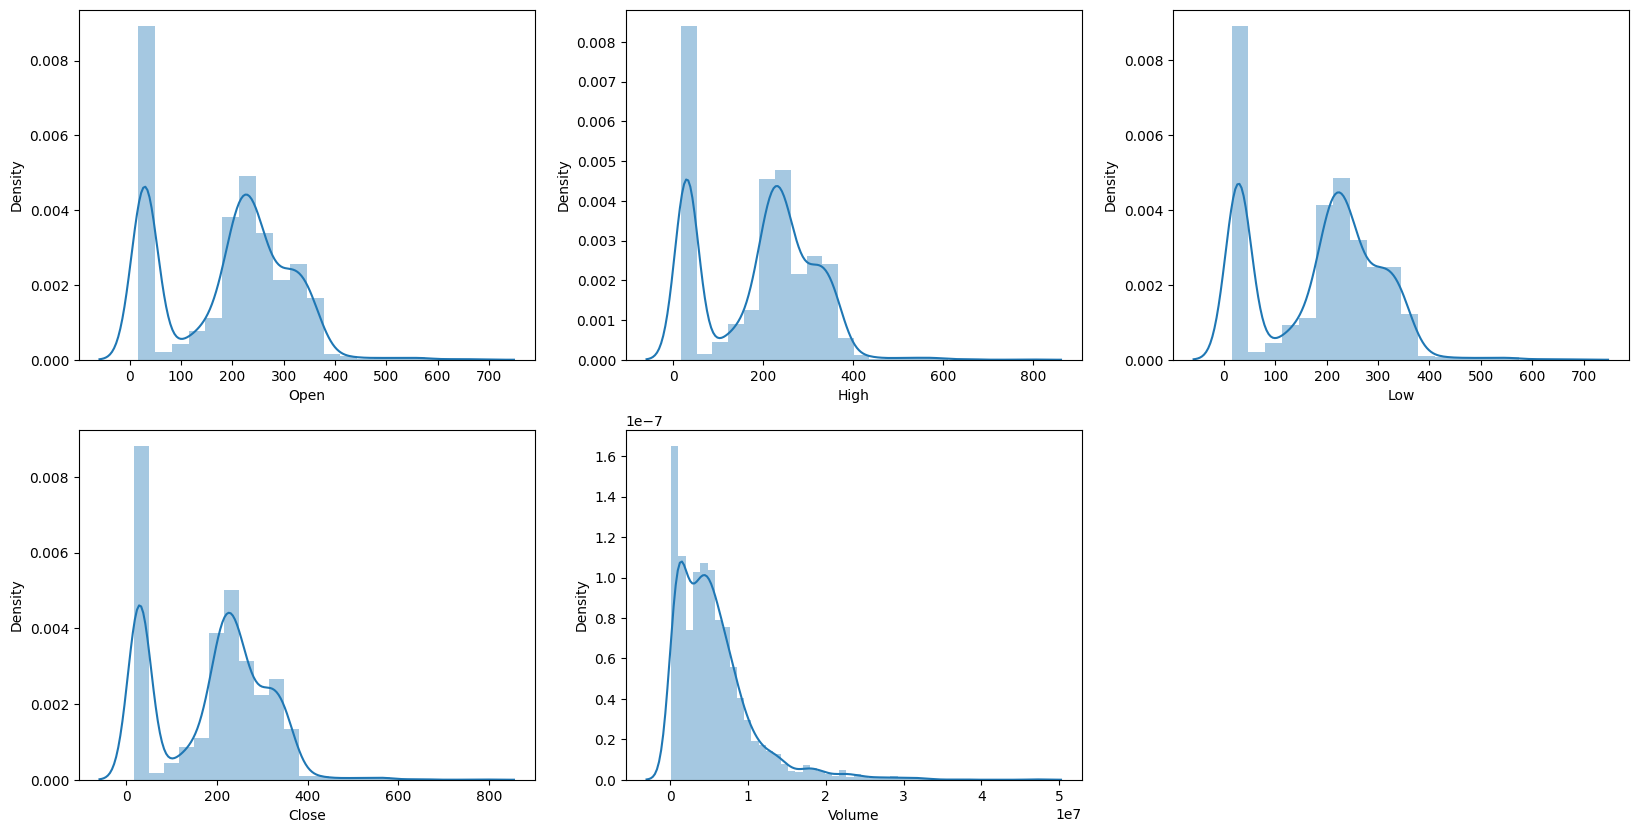

In [14]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()


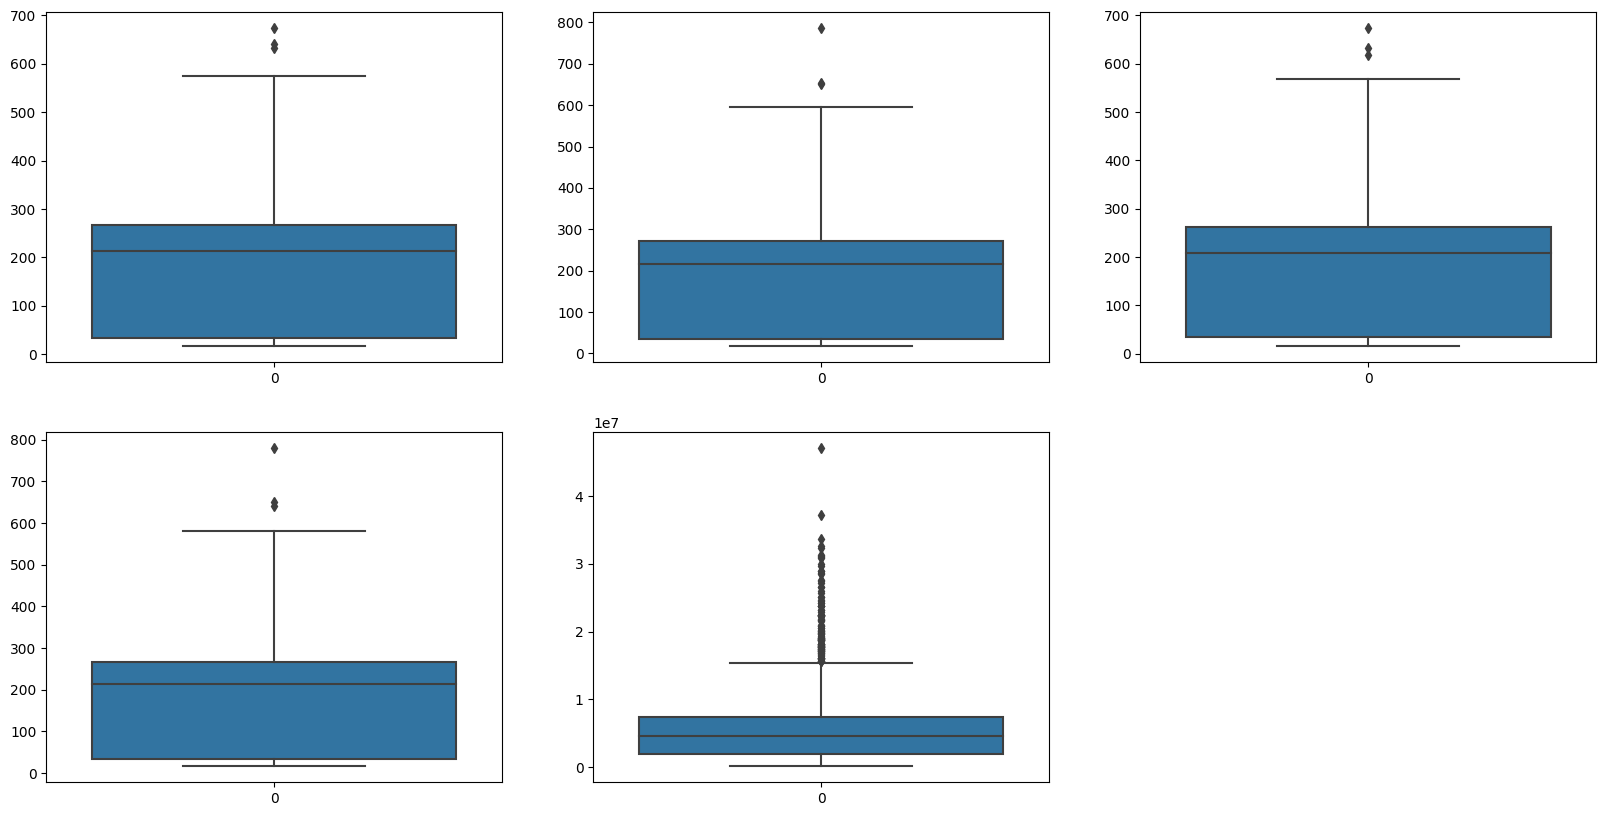

In [13]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()


# Feature Engineering

In [30]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [37]:
df['quarter'] = np.where(df['month']%3 == 0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,quarter
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


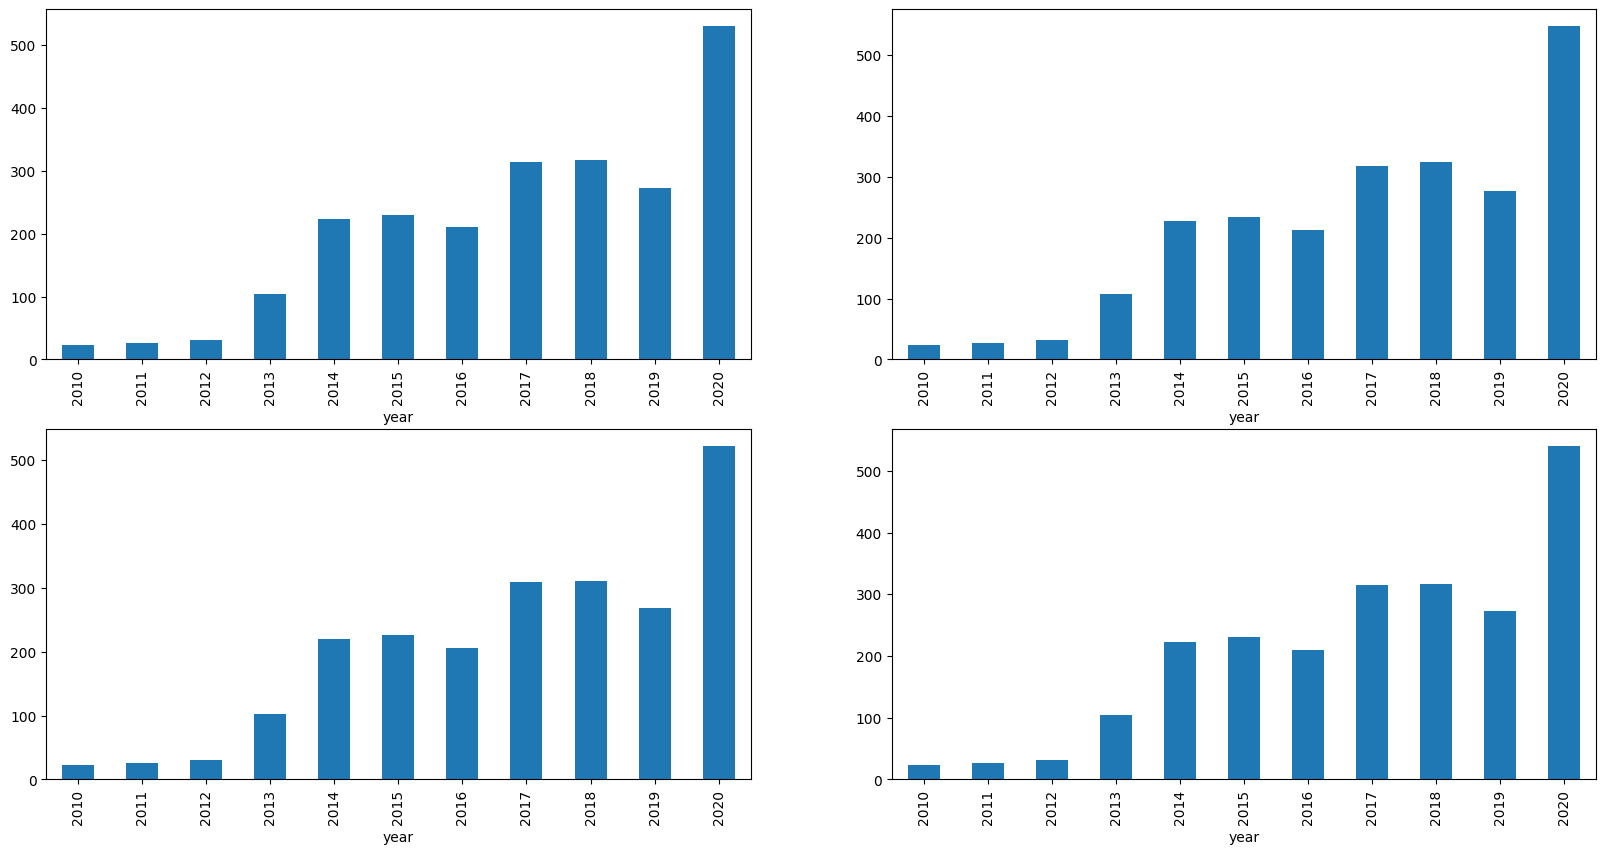

In [38]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low',	'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [39]:
df.groupby('quarter').mean()

,Open,High,Low,Close,Volume,day,month,year
quarter,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,5.767062e+06,15.710396,6.173886,2014.816213
1,187.071200,190.232700,183.860262,187.047163,5.180154e+06,15.825000,7.597500,2014.697500


Here are some of the important observations of the above-grouped data:

* Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
* The volume of trades is lower in the months which are quarter end.

In [40]:
# Lets add some feature columns
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

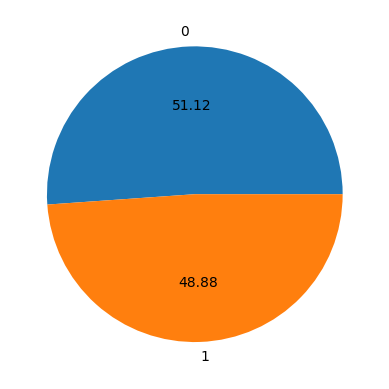

In [48]:
plt.pie(df['target'].value_counts().values,
        labels=[0,1], autopct='%.2f')
plt.show()

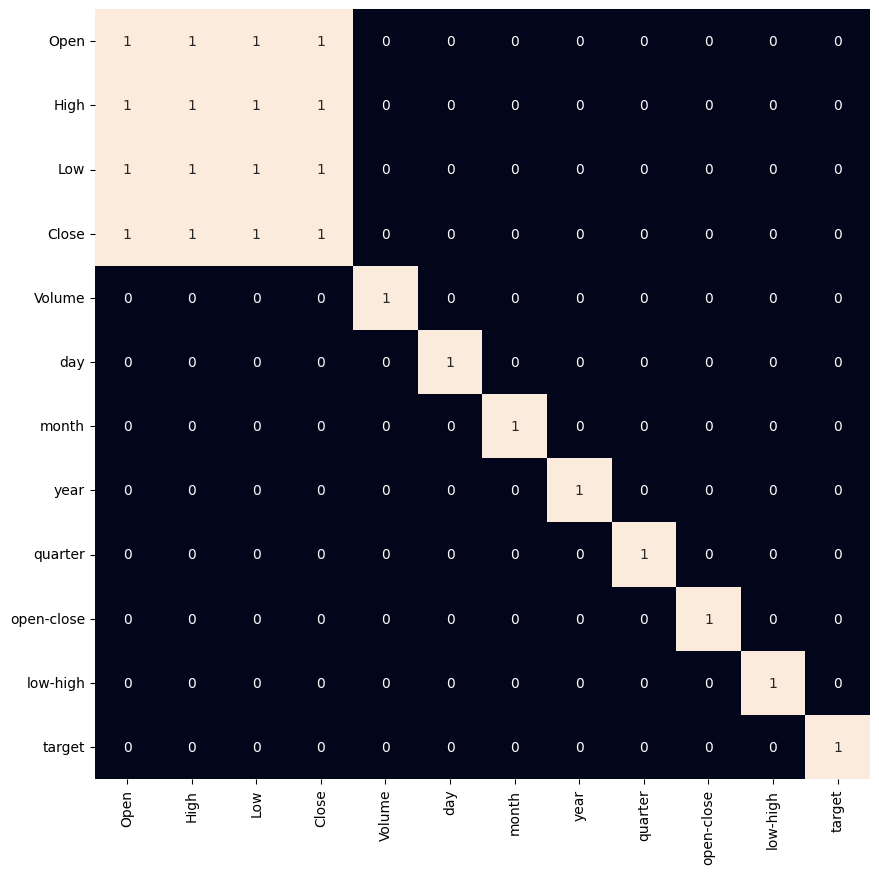

In [49]:
plt.figure(figsize=(10, 10))
'''
   As our concern is with the highly
   correlated features only so, we will visualize
   our heatmap as per that criteria only.
'''
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


# Data Splitting




In [53]:
features = df[['open-close', 'low-high', 'quarter']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = tts(
	features, target, test_size=0.1, random_state=42)
print(X_train.shape, X_valid.shape)


(2174, 3) (242, 3)


# Model Building

In [54]:
model = [LogisticRegression(),
         SVC(kernel='poly', probability=True),
         XGBClassifier()
         ]

for i in range(3):
  model[i].fit(X_train, Y_train)
  print(f'{model[i]}: ')
  print('Training Accuracy: ', metrics.roc_auc_score(
      Y_train, model[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, model[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression(): 
Training Accuracy:  0.5197067500814818
Validation Accuracy :  0.5473901098901099

SVC(kernel='poly', probability=True): 
Training Accuracy:  0.5232026378947636
Validation Accuracy :  0.4869505494505494

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 
Training Accur

Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high.

[[ 27  85]
 [ 19 111]]


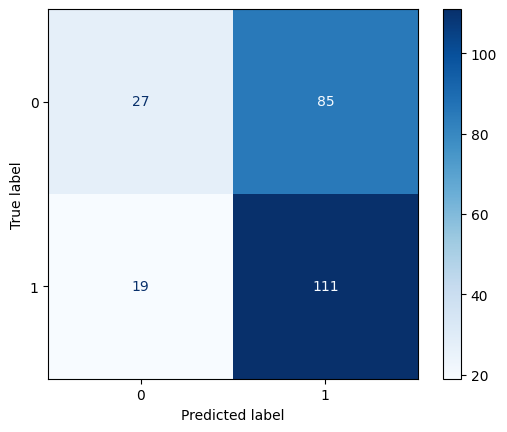

In [66]:
disp = ConfusionMatrixDisplay.from_estimator(
    model[0],
    X_valid, Y_valid,
    cmap=plt.cm.Blues)

print(disp.confusion_matrix)

plt.show()

[[  0 112]
 [  1 129]]


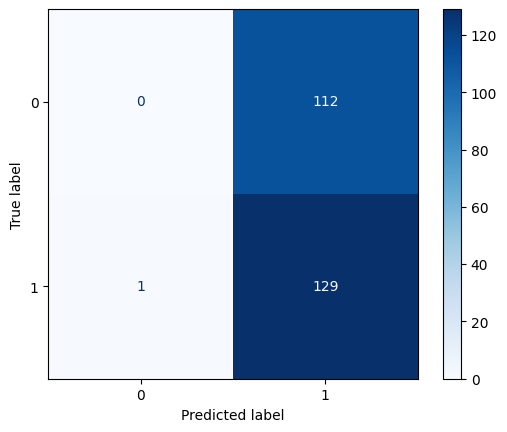

In [67]:
disp = ConfusionMatrixDisplay.from_estimator(
    model[1],
    X_valid, Y_valid,
    cmap=plt.cm.Blues)

print(disp.confusion_matrix)

plt.show()

[[57 55]
 [62 68]]


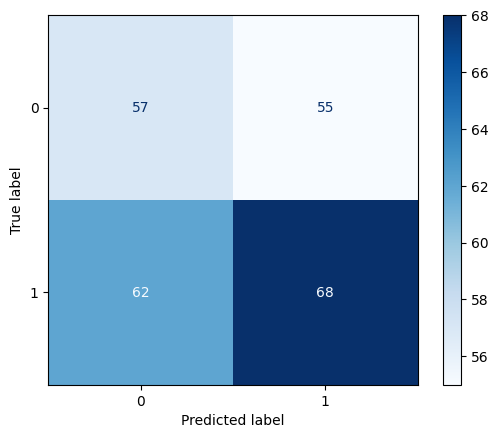

In [65]:
disp = ConfusionMatrixDisplay.from_estimator(
    model[2],
    X_valid, Y_valid,
    cmap=plt.cm.Blues)

print(disp.confusion_matrix)

plt.show()

# **Accuracy ≈**

*   # **Logistic Regression: 0.5702 *or* 57.02**
*   # **SVC: 0.5330 *or* 53.30**
*   # **XGBClassifier: 0.5165 *or* 51.65**

